# Predicting Diabetes using Logistic Regression

We predicte dibetes by using logistic regression. For the same pima indian dibetes dataset used which is downloaded from kaggle(https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

We divided work in following parts:

1.Importing dependencies and Load data

2.Exploratory Data Analysis(EDA)

3.Model Creation

4.Model Evaluation

In [32]:
#1.Importing dependencies and Load data
#1.1 Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from imblearn.over_sampling import RandomOverSampler

In [4]:
#1.2 Loading dataset

data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#2. Exploratory Data Analysis
# No of rows and columns

data.shape

(768, 9)

In [6]:
# Information about dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Statistical analysis

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Checking null values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

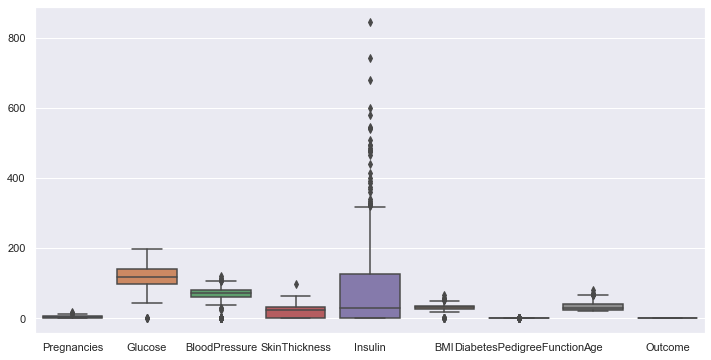

In [9]:
# Outlier detection using boxplot

sns.set(rc={"figure.figsize":(12,6)})
sns.boxplot(data=data)

In [10]:
#Removal of outlieres using Z score method

data['zscore']=(data.Insulin-data.Insulin.mean())/data.Insulin.std()
data1=data[~((data['zscore']>3)|(data['zscore']<-3))]
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zscore
0,6,148,72,35,0,33.6,0.627,50,1,-0.692439
1,1,85,66,29,0,26.6,0.351,31,0,-0.692439
2,8,183,64,0,0,23.3,0.672,32,1,-0.692439
3,1,89,66,23,94,28.1,0.167,21,0,0.123221
4,0,137,40,35,168,43.1,2.288,33,1,0.765337
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.869464
764,2,122,70,27,0,36.8,0.340,27,0,-0.692439
765,5,121,72,23,112,26.2,0.245,30,0,0.279412
766,1,126,60,0,0,30.1,0.349,47,1,-0.692439


In [11]:
data1=data1.drop('zscore',axis=1)

In [12]:
#Removal of outlieres using Z score method
data1['zscore']=(data1.BloodPressure-data1.BloodPressure.mean())/data1.BloodPressure.std()
data2=data1[~((data1['zscore']>3)|(data1['zscore']<-3))]
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zscore
0,6,148,72,35,0,33.6,0.627,50,1,0.153805
1,1,85,66,29,0,26.6,0.351,31,0,-0.153942
2,8,183,64,0,0,23.3,0.672,32,1,-0.256525
3,1,89,66,23,94,28.1,0.167,21,0,-0.153942
4,0,137,40,35,168,43.1,2.288,33,1,-1.487515


In [13]:
data2=data2.drop('zscore',axis=1)

<AxesSubplot:>

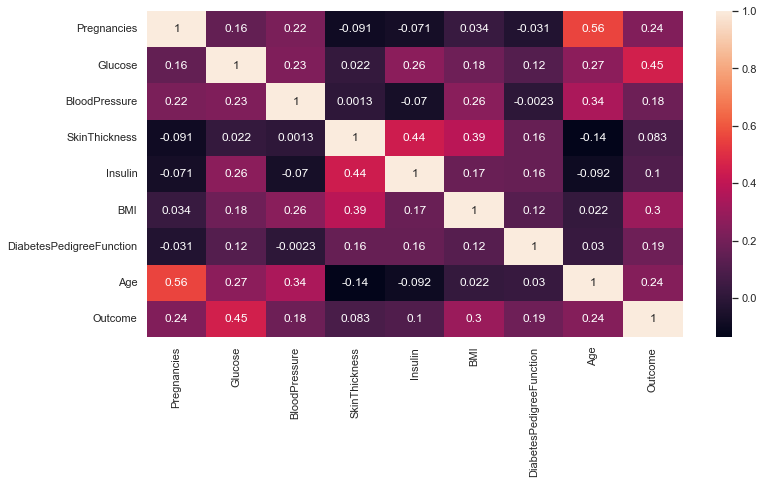

In [14]:
# Correlation between features

cor=data2.corr()
sns.heatmap(cor,annot=True)

In [15]:
#3 Model Creation
# Selection of independent and dependent feature
# X is independent and y is dependent(target) feature

X=data2[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','Age']].values
y=data2['Outcome'].values

In [16]:
# Sampling of the data

obj=RandomOverSampler(sampling_strategy=0.90)
X1,y1=obj.fit_resample(X,y)


In [17]:
print("X1:",np.shape(X1))
print("y1:",np.shape(y1))

X1: (902, 6)
y1: (902,)


In [18]:
# Splitting the data 

X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=2)
print("Total no. of samples:")
print("X_train:",np.shape(X_train))
print("X_test:",np.shape(X_test))
print("y_train:",np.shape(y_train))
print("y_test:",np.shape(y_test))

Total no. of samples:
X_train: (721, 6)
X_test: (181, 6)
y_train: (721,)
y_test: (181,)


In [19]:
# Standardization/Scaling of X_train and X_test

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [20]:
# train the model

lr=LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [21]:
#4 Model Evaluation
# Confusion Matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[73, 22],
       [31, 55]], dtype=int64)

In [22]:
TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]
print("TP:",TP)
print("FP",FP)
print("FN",FN)
print("TN",TN)

TP: 73
FP 22
FN 31
TN 55


In [31]:
# Accuracy,Precision,Recall,F1-score

P1=TP/(TP+FP)
R1=TP/(TP+FN)
print("Accuracy:",(TP+TN)/(TP+TN+FP+FN))
print("Precision:",P1)
print("Recall:",R1)
print('F1-score:',2*((P1*R1)/(P1+R1)))

Accuracy: 0.7071823204419889
Precision: 0.7684210526315789
Recall: 0.7019230769230769
F1-score: 0.7336683417085427


In [23]:
# Accuracy score

sc=accuracy_score(y_test,y_pred)
sc

0.7071823204419889

In [24]:
# Precision Score

p=precision_score(y_test,y_pred)
p

0.7142857142857143

In [25]:
#recall_score

r=recall_score(y_test,y_pred)
r

0.6395348837209303

In [26]:
# f1 score for model evaluting

f1=2*(p*r)/(p+r)
f1

0.6748466257668713

In [34]:
X_test

array([[ 1.09987125,  1.99972942,  0.20302717,  1.92166127,  0.65307885,
         2.20353991],
       [-0.65153664,  0.42542889,  0.12081707, -0.798952  , -0.9944575 ,
        -0.40508898],
       [ 0.51606862, -1.0107751 ,  0.53186761, -0.798952  , -1.32673374,
        -0.12559302],
       ...,
       [-0.06773401,  0.23209374,  1.02512826, -0.798952  , -0.66218126,
         2.76253182],
       [ 1.39177256,  0.01113928, -0.29023348,  3.10707134,  0.36233714,
         0.06073761],
       [-1.23533926,  0.39780958, -1.11233456,  0.82369949,  0.25157839,
        -1.15041152]])

In [57]:
# Model predication
result=model.predict([[-0.65153664,  0.42542889,  0.12081707, -0.798952  , -0.9944575 ,
        -0.40508898]])
if result[0]==1:
    print("You have Dibetes Symptoms")
else:
    print("Dont worry....No Dibetes....!!")

Dont worry....No Dibetes....!!


In [33]:
# Classification report of selected classification algorithm

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        95
           1       0.71      0.64      0.67        86

    accuracy                           0.71       181
   macro avg       0.71      0.70      0.70       181
weighted avg       0.71      0.71      0.71       181



In [52]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64